*Taiwan Air Quality Index Data* 

JISHNU E

Entri Elevate

Date:30/12/2024

Overview of Problem Statement
    This dataset analyzes air quality trends and relationships between various pollutants . 
    Regression Analysis: You can use regression techniques to predict AQI based on levels of specific pollutants like PM2.5, CO, and SO2.
    By treating AQI as the target variable, you can build models to predict how pollutant concentrations impact air quality. 

Objective:
  To Forecast Air Quality Index &  Predict PM2.5 Levels 

Dataset:
  The dataset for this analysis is publicly available on the Kaggle ML Repository at the following link :- 
      https://www.kaggle.com/datasets/taweilo/taiwan-air-quality-data-20162024

Dataset Features:
The dataset initially contains 1,048,576 rows, representing extensive air quality data. For the analysis, the data was sorted to focus on one month’s data, reducing it to 62,964 rows for more manageable processing. Below are the features in the dataset:

1.date: Date and time of the reading (Text)
2.sitename: Station name (Text)
3.county: County or city (Text)
4.aqi: Air Quality Index (Numeric)
5.pollutant: Main pollutant (Text)
6.status: Status of air quality (Text)
7.so2: Sulfur Dioxide in ppb (Numeric)
8.co: Carbon Monoxide in ppm (Numeric)
9.o3: Ozone in ppb (Numeric)
10.o3_8hr: 8-hour average of Ozone (Numeric)
11.pm10: Particulate matter under 10μm (Numeric)
12.pm2.5: Particulate matter under 2.5μm (Numeric)
13.no2: Nitrogen Dioxide in ppb (Numeric)
14.nox: Nitrogen Oxides in ppb (Numeric)
15.no: Nitric Oxide in ppb (Numeric)
16.windspeed: Wind speed in m/sec (Numeric)
17.winddirec: Wind direction in degrees (Numeric)
18.unit: Unit of measurement (Text)
19.co_8hr: 8-hour average of CO (Numeric)
20.pm2.5_avg: Moving average of PM2.5 (Numeric)
21.pm10_avg: Moving average of PM10 (Numeric)
22.so2_avg: Moving average of SO2 (Numeric)
23.longitude: Longitude of the site (Numeric)
24.latitude: Latitude of the site (Numeric)
25.siteid: Station ID (Numeric)

   

In [1]:
# Libraries for data manipulation and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Libraries for model building and evaluation

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

Data Collection

In [5]:
# Load dataset

file_path = 'python files/capstone - ML Project/Taiwan Air Quality Index Data .csv'
data = pd.read_csv('Taiwan Air Quality Index Data .csv')

In [7]:
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62964 entries, 0 to 62963
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       62964 non-null  object 
 1   sitename   62964 non-null  object 
 2   county     62964 non-null  object 
 3   aqi        62943 non-null  float64
 4   pollutant  9088 non-null   object 
 5   status     62910 non-null  object 
 6   so2        61701 non-null  float64
 7   co         62302 non-null  float64
 8   o3         62161 non-null  float64
 9   o3_8hr     62638 non-null  float64
 10  pm10       62298 non-null  float64
 11  pm2.5      62241 non-null  float64
 12  no2        61955 non-null  float64
 13  nox        61955 non-null  float64
 14  no         61955 non-null  float64
 15  windspeed  62704 non-null  object 
 16  winddirec  62681 non-null  object 
 17  unit       0 non-null      float64
 18  co_8hr     62790 non-null  float64
 19  pm2.5_avg  62664 non-null  f

Data Preprocessing - Data Cleaning

In [9]:
# Handling missing values
data = data.dropna(subset=['aqi', 'pm2.5'])  
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(exclude=np.number).columns


In [11]:
print(data.head())

# Verify that missing values are handled
print(f"Missing values in numerical columns:\n{data[num_cols].isnull().sum()}")
print(f"Missing values in categorical columns:\n{data[cat_cols].isnull().sum()}")


            date  sitename          county   aqi pollutant status  so2    co  \
0  8/1/2024 0:00     Sanyi   Miaoli County  22.0       NaN   Good  0.6  0.11   
1  8/1/2024 0:00     Shalu   Taichung City  21.0       NaN   Good  0.8  0.17   
2  8/1/2024 0:00  Fengyuan   Taichung City  18.0       NaN   Good  0.9  0.19   
3  8/1/2024 0:00   Zhudong  Hsinchu County  26.0       NaN   Good  0.4  0.16   
4  8/1/2024 0:00    Miaoli   Miaoli County  19.0       NaN   Good  0.3  0.11   

     o3  o3_8hr  ...  windspeed  winddirec  unit  co_8hr  pm2.5_avg pm10_avg  \
0  17.3    18.6  ...        3.8        184   NaN     0.1        6.9     12.0   
1  14.1    18.0  ...        2.3        176   NaN     0.1        6.6     16.0   
2  20.0    19.6  ...        3.6        172   NaN     0.2        4.1     11.0   
3   7.9    13.0  ...        0.2        201   NaN     0.2        8.0     19.0   
4  17.6    19.7  ...        3.9        205   NaN     0.1        5.9     11.0   

  so2_avg   longitude   latitude  site

In [13]:
data = data.drop(['siteid', 'sitename'], axis=1)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 62240 entries, 0 to 62963
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       62240 non-null  object 
 1   county     62240 non-null  object 
 2   aqi        62240 non-null  float64
 3   pollutant  9021 non-null   object 
 4   status     62237 non-null  object 
 5   so2        61239 non-null  float64
 6   co         61806 non-null  float64
 7   o3         61709 non-null  float64
 8   o3_8hr     61988 non-null  float64
 9   pm10       61877 non-null  float64
 10  pm2.5      62240 non-null  float64
 11  no2        61504 non-null  float64
 12  nox        61504 non-null  float64
 13  no         61504 non-null  float64
 14  windspeed  62069 non-null  object 
 15  winddirec  62047 non-null  object 
 16  unit       0 non-null      float64
 17  co_8hr     62116 non-null  float64
 18  pm2.5_avg  62155 non-null  float64
 19  pm10_avg   62153 non-null  float64
 20  so2_avg    

In [15]:
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(exclude=np.number).columns

print("\nDescriptive Statistics:")
print(data.describe())

print("\nCategorical Columns Summary:")
print(data.describe(include=['O']))


Descriptive Statistics:
                aqi           so2            co            o3        o3_8hr  \
count  62240.000000  61239.000000  61806.000000  61709.000000  61988.000000   
mean      35.714203      1.016442      0.227294     25.085247     25.070307   
std       13.777386      0.794551      0.180652     15.775637     13.170620   
min       -1.000000      0.000000      0.000000      0.000000      0.000000   
25%       26.000000      0.600000      0.140000     12.800000     15.000000   
50%       34.000000      0.900000      0.180000     22.500000     23.300000   
75%       44.000000      1.300000      0.250000     34.300000     33.000000   
max      136.000000     27.100000      4.320000    133.400000     81.500000   

               pm10         pm2.5           no2           nox            no  \
count  61877.000000  62240.000000  61504.000000  61504.000000  61504.000000   
mean      20.151139     10.277715      7.180803      9.684079      2.462235   
std        8.788775      5

In [21]:
# Impute missing values

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

data = data.drop_duplicates()

In [23]:
# Missing values

print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
date             0
county           0
aqi              0
pollutant        0
status           0
so2              0
co               0
o3               0
o3_8hr           0
pm10             0
pm2.5            0
no2              0
nox              0
no               0
windspeed        0
winddirec        0
unit         62240
co_8hr           0
pm2.5_avg        0
pm10_avg         0
so2_avg          0
longitude        0
latitude         0
dtype: int64


Exploratory Data Analysis (EDA)

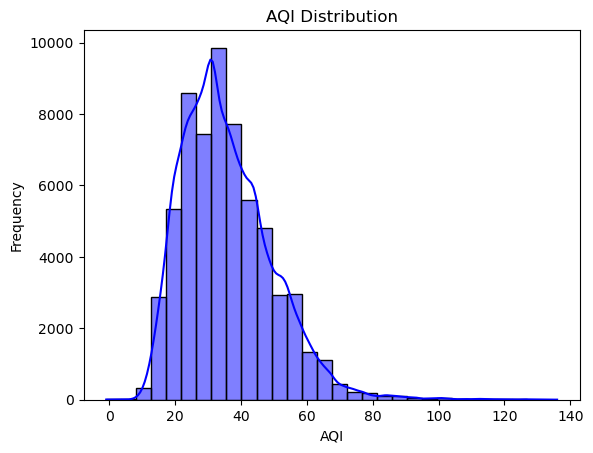

In [25]:
# Distribution of AQI
sns.histplot(data['aqi'], kde=True, bins=30, color='blue')
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


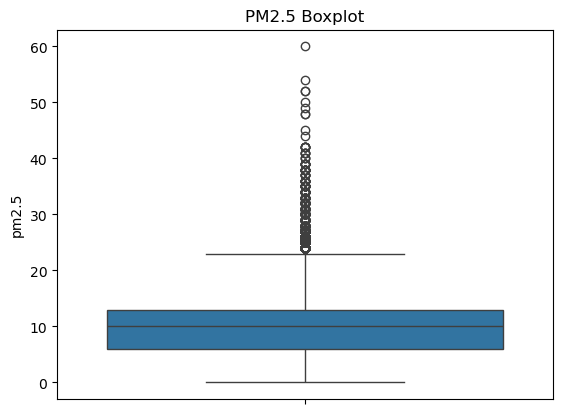

In [27]:
# Boxplot for PM2.5

sns.boxplot(data['pm2.5'])
plt.title("PM2.5 Boxplot")
plt.show()

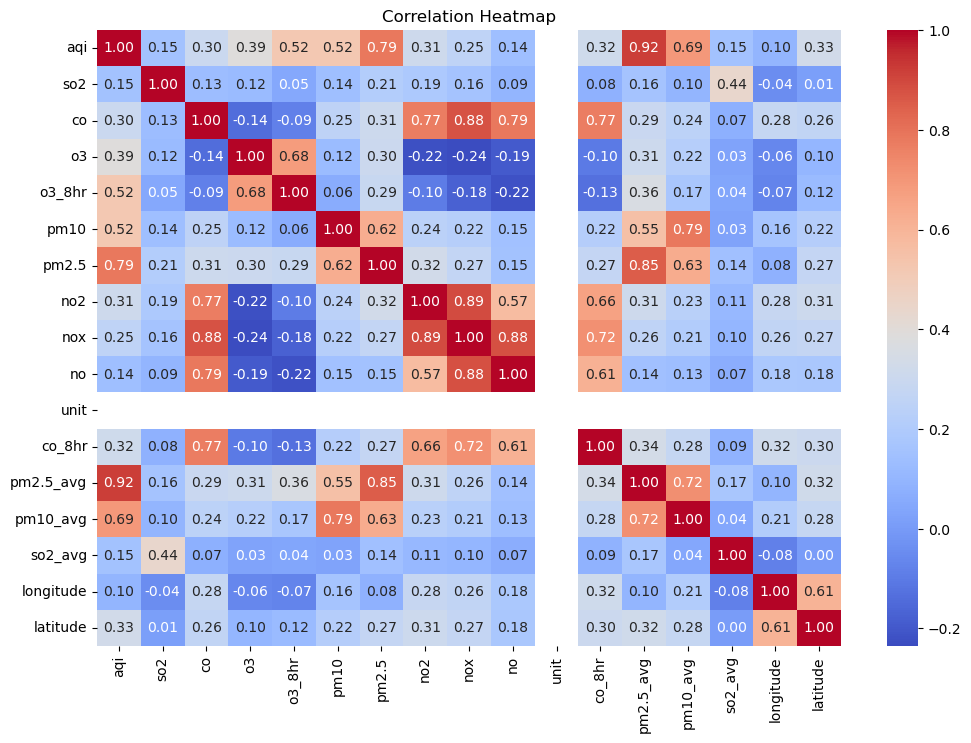

In [29]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

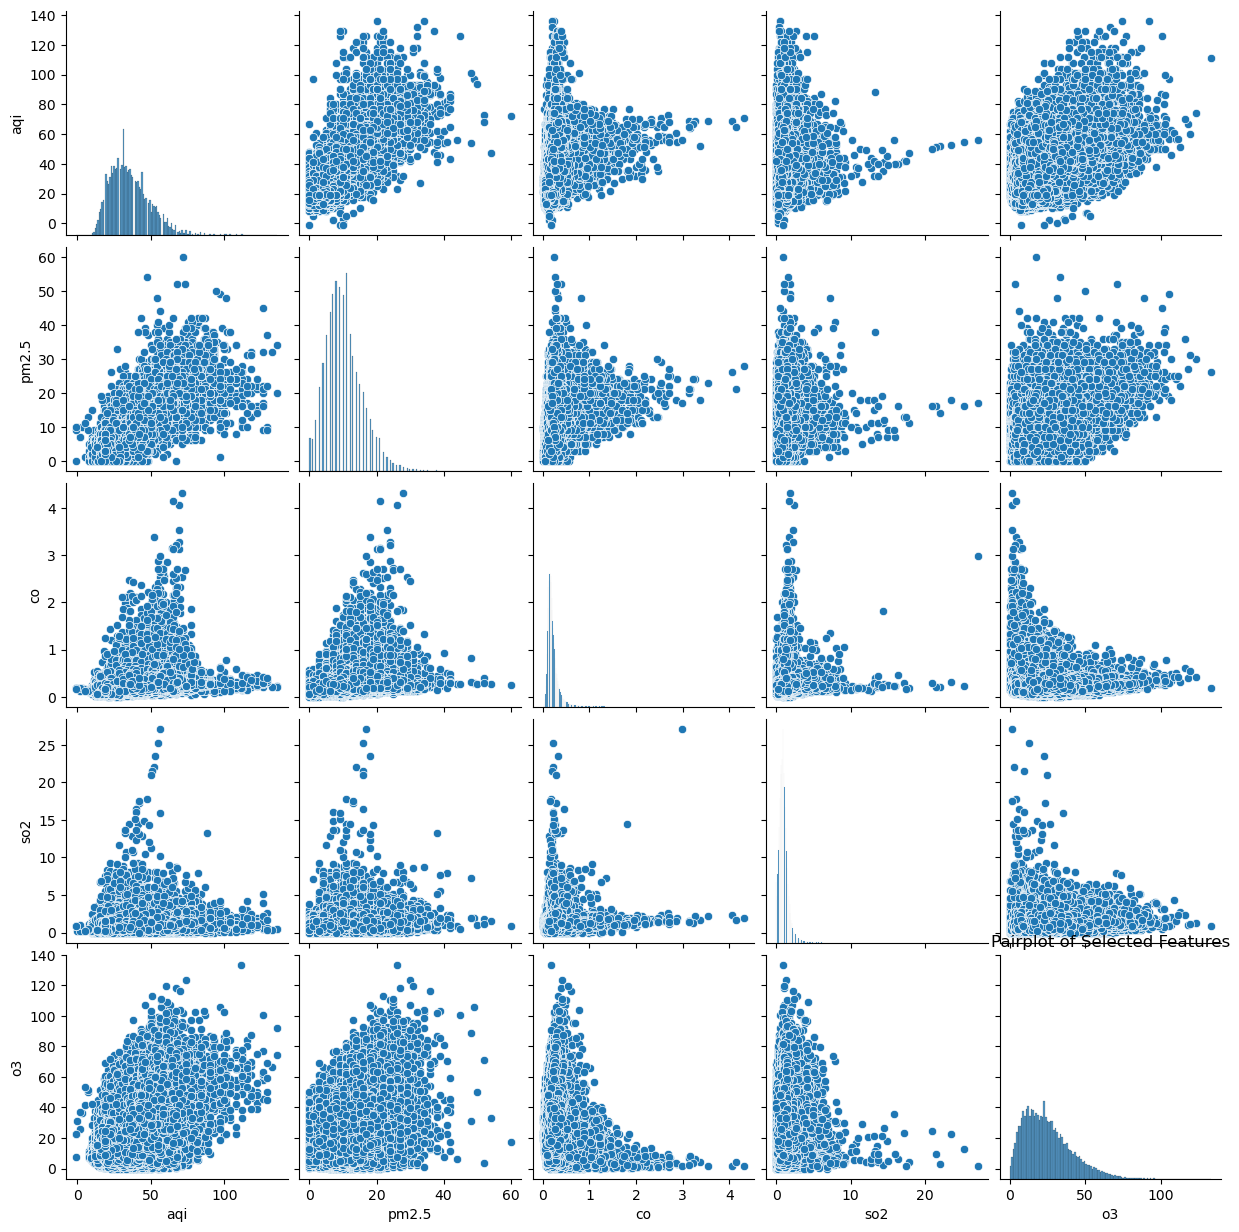

In [31]:
# Pairplot for selected features

selected_features = ['aqi', 'pm2.5', 'co', 'so2', 'o3']
sns.pairplot(data[selected_features])
plt.title("Pairplot of Selected Features")
plt.show()

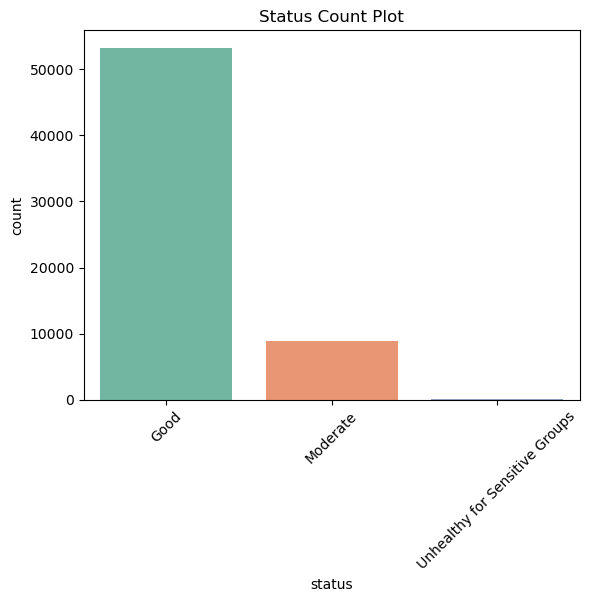

In [32]:
# Count plot for 'status'

sns.countplot(x='status', data=data, palette='Set2', hue='status', dodge=False, legend=False)
plt.title("Status Count Plot")
plt.xticks(rotation=45)
plt.show()

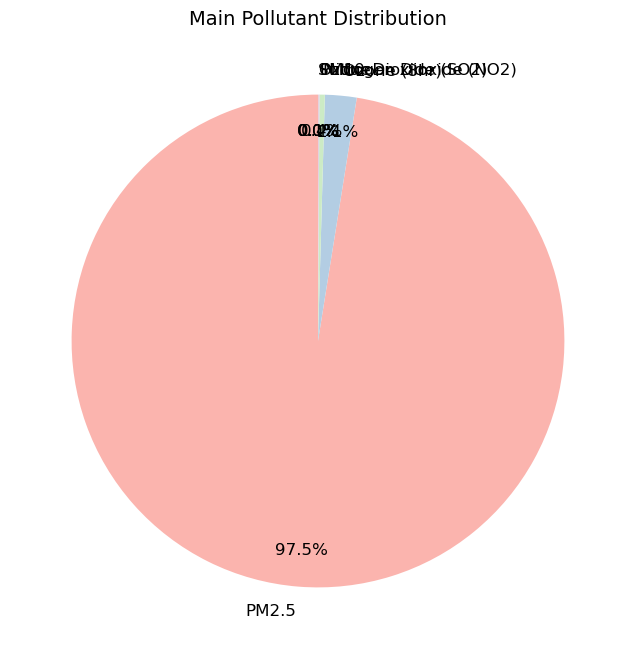

In [33]:
# Pie chart for 'pollutant'

pollutant_counts = data['pollutant'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    pollutant_counts, 
    labels=pollutant_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Pastel1.colors,
    textprops={'fontsize': 12},  
    pctdistance=0.85,  
    labeldistance=1.1 )
plt.title("Main Pollutant Distribution", fontsize=14)
plt.show()

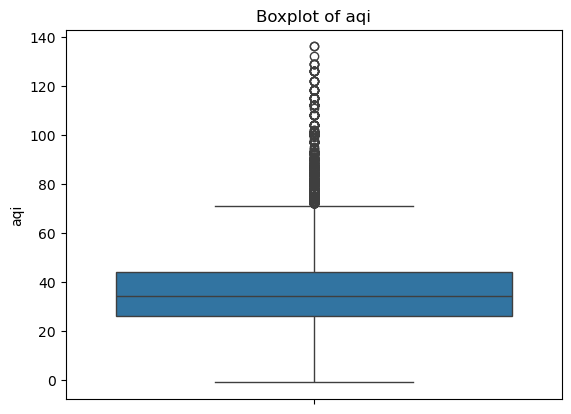

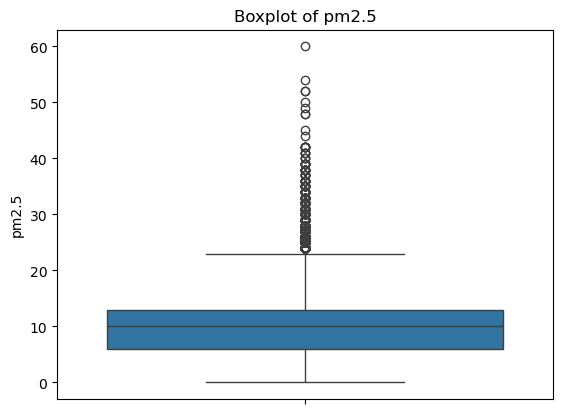

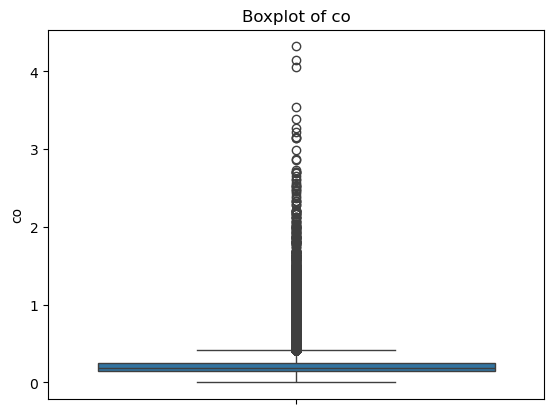

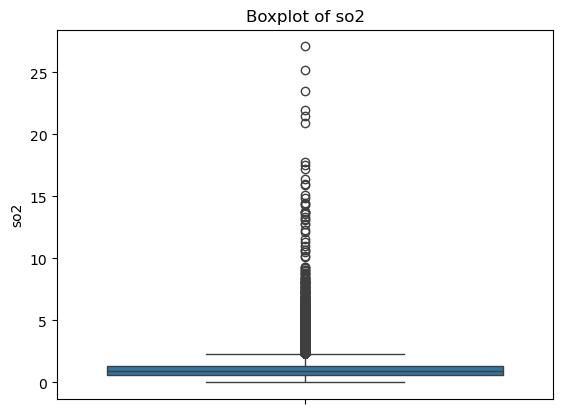

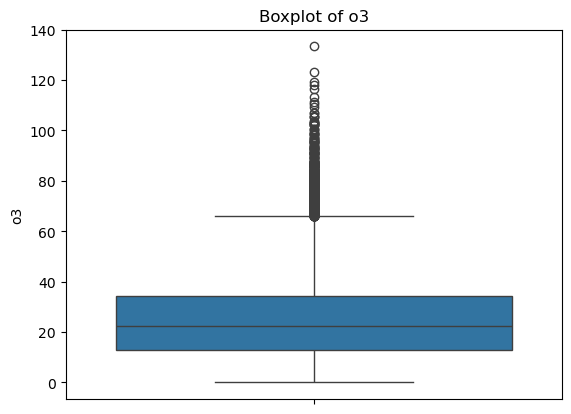

In [35]:
# Boxplot for detecting outliers in numerical features

numerical_features = ['aqi', 'pm2.5', 'co', 'so2', 'o3']
for feature in numerical_features:
    sns.boxplot(data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [36]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

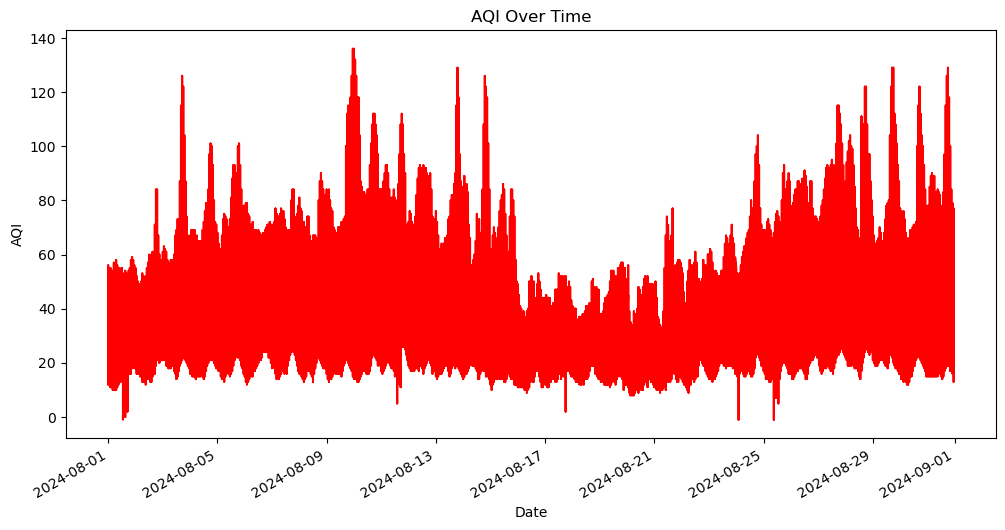

In [37]:
# Line plot for AQI over time

data['aqi'].plot(figsize=(12, 6), title="AQI Over Time", color='red')
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29344\289606585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pollutant_counts.index, y=pollutant_counts.values, palette='coolwarm', hue=None)


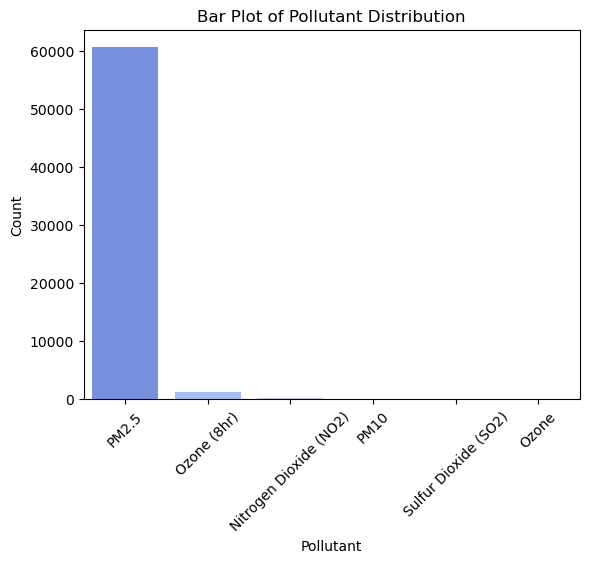

In [38]:
# Bar plot for pollutant distribution

pollutant_counts = data['pollutant'].value_counts()
sns.barplot(x=pollutant_counts.index, y=pollutant_counts.values, palette='coolwarm', hue=None)
plt.title("Bar Plot of Pollutant Distribution")
plt.xlabel("Pollutant")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

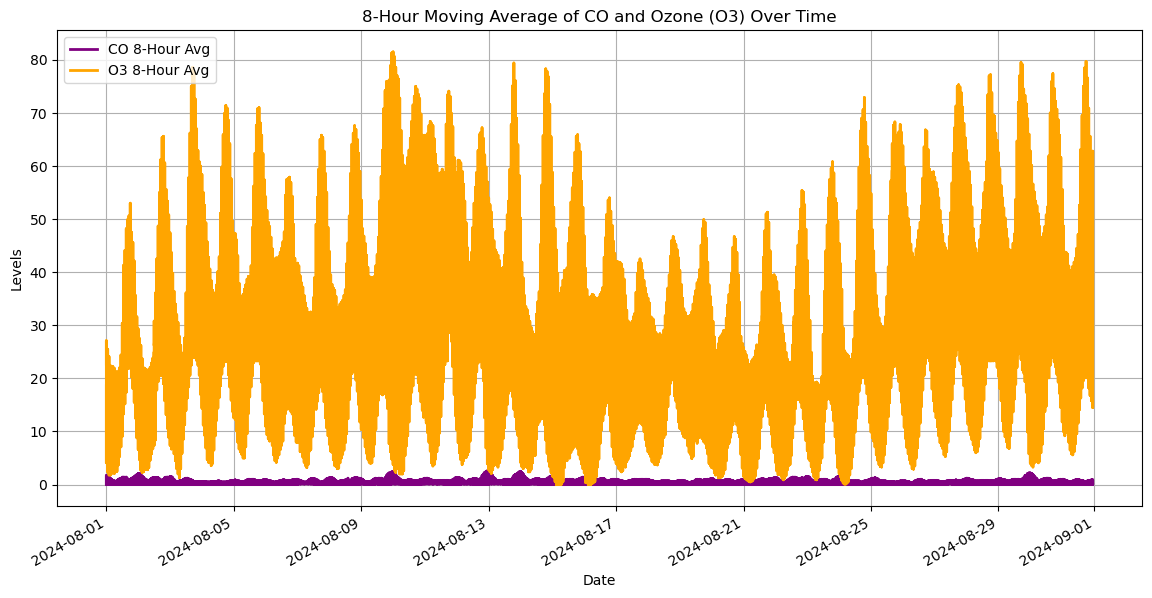

In [39]:
# Line Plot for 8-hour moving averages of pollutants over time

if all(col in data.columns for col in ['co_8hr', 'o3_8hr']):
    plt.figure(figsize=(14, 7))
    data['co_8hr'].plot(label='CO 8-Hour Avg', color='purple', linewidth=2)
    data['o3_8hr'].plot(label='O3 8-Hour Avg', color='orange', linewidth=2)

    plt.title("8-Hour Moving Average of CO and Ozone (O3) Over Time")
    plt.xlabel("Date")
    plt.ylabel("Levels")
    plt.legend()
    plt.grid(True)
    plt.show()

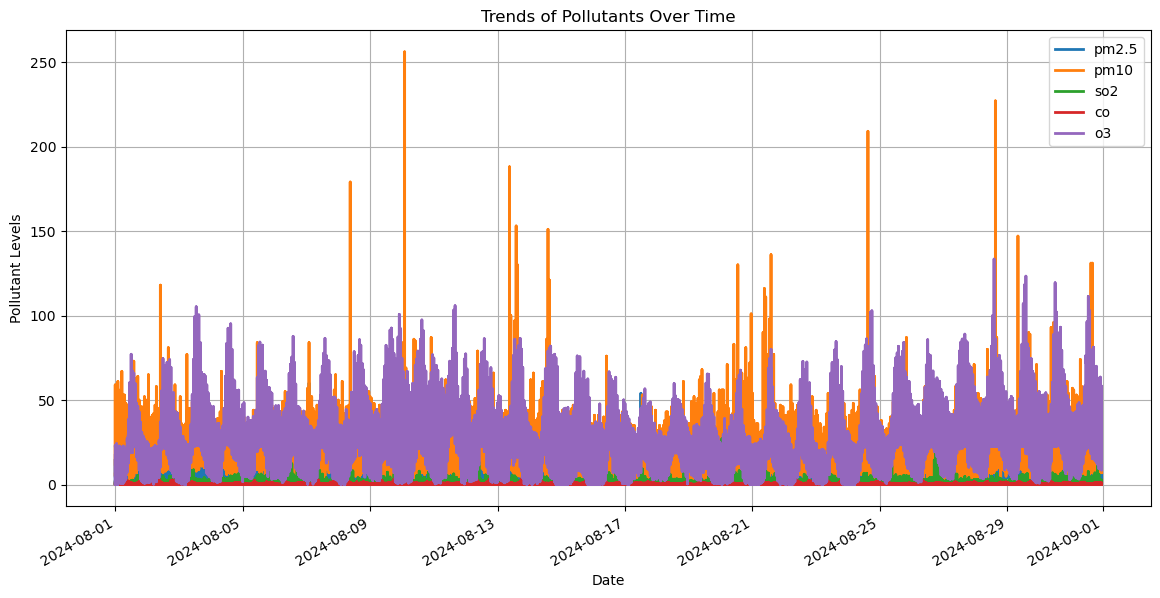

In [41]:
# Line Plot for multiple pollutants over time

pollutants = ['pm2.5', 'pm10', 'so2', 'co', 'o3']
if all(pollutant in data.columns for pollutant in pollutants):
    plt.figure(figsize=(14, 7))
    for pollutant in pollutants:
        data[pollutant].plot(label=pollutant, linewidth=2)

    plt.title("Trends of Pollutants Over Time")
    plt.xlabel("Date")
    plt.ylabel("Pollutant Levels")
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29344\2265786766.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['aqi'], shade=True, color='blue')


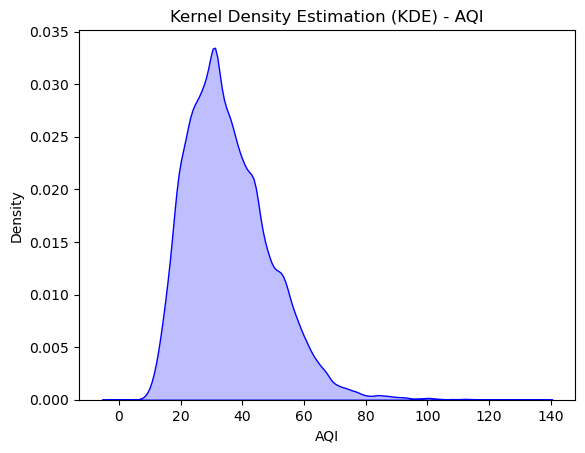

In [44]:
# Distribution of AQI with KDE

sns.kdeplot(data['aqi'], shade=True, color='blue')
plt.title("Kernel Density Estimation (KDE) - AQI")
plt.xlabel("AQI")
plt.ylabel("Density")
plt.show()

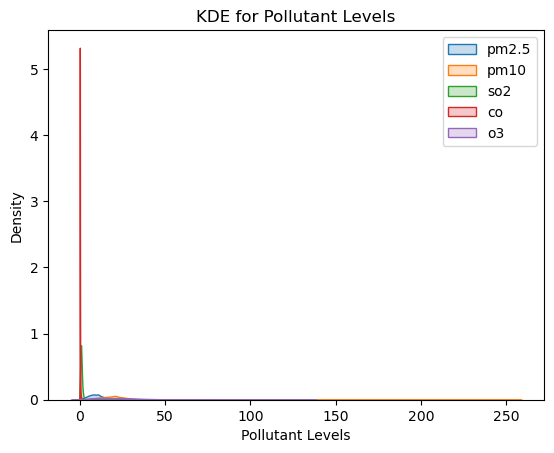

In [359]:
# KDE for multiple pollutants

pollutants = ['pm2.5', 'pm10', 'so2', 'co', 'o3']
for pollutant in pollutants:
    sns.kdeplot(data[pollutant], fill=True, label=pollutant)  
    
plt.title("KDE for Pollutant Levels")
plt.xlabel("Pollutant Levels")
plt.ylabel("Density")
plt.legend()
plt.show()

In [55]:
# Save descriptive statistics to a CSV file

data.describe().to_csv("eda_summary.csv")
print("EDA report saved as eda_summary.csv")

EDA report saved as eda_summary.csv


Feature Engineering

In [267]:

categorical_columns = data.select_dtypes(include='object').columns
print(f"Categorical columns: {categorical_columns}")


data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


data_encoded.head()


Categorical columns: Index(['county', 'pollutant', 'status', 'windspeed', 'winddirec'], dtype='object')


,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,...,winddirec_90,winddirec_91,winddirec_92,winddirec_93,winddirec_94,winddirec_95,winddirec_96,winddirec_97,winddirec_98,winddirec_99
date,,,,,,,,,,,,,,,,,,,,,
2024-08-01,22.0,0.6,0.11,17.3,18.6,12.0,5.0,1.6,2.4,0.7,...,False,False,False,False,False,False,False,False,False,False
2024-08-01,21.0,0.8,0.17,14.1,18.0,15.0,6.0,5.6,6.0,0.4,...,False,False,False,False,False,False,False,False,False,False
2024-08-01,18.0,0.9,0.19,20.0,19.6,10.0,4.0,1.7,2.6,0.9,...,False,False,False,False,False,False,False,False,False,False
2024-08-01,26.0,0.4,0.16,7.9,13.0,21.0,11.0,4.4,5.0,0.6,...,False,False,False,False,False,False,False,False,False,False
2024-08-01,19.0,0.3,0.11,17.6,19.7,7.0,4.0,3.2,4.4,1.2,...,False,False,False,False,False,False,False,False,False,False


Feature Selection using Random Forest

      Feature  Importance
14  pm2.5_avg    0.844041
5      o3_8hr    0.129092
8         no2    0.015322
15   pm10_avg    0.009283
4          o3    0.000432
7       pm2.5    0.000307
2         so2    0.000300
6        pm10    0.000222
9         nox    0.000198
3          co    0.000175
10         no    0.000146
12  winddirec    0.000139
11  windspeed    0.000112
18   latitude    0.000105
17  longitude    0.000082
16    so2_avg    0.000027
13     co_8hr    0.000017
1      status    0.000000
0   pollutant    0.000000


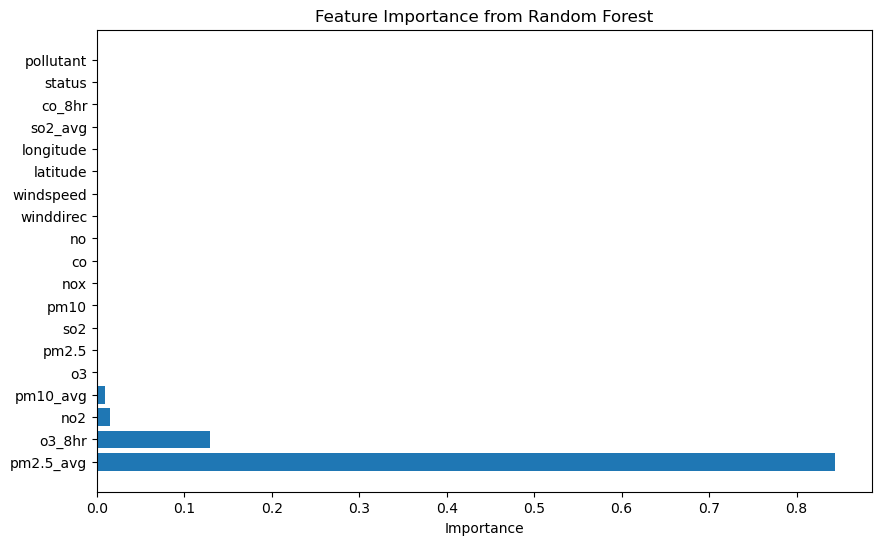

In [269]:
from sklearn.preprocessing import LabelEncoder


data.replace('-', np.nan, inplace=True)


data = data.apply(pd.to_numeric, errors='coerce')


data.fillna(data.mean(), inplace=True)


X = data.drop(['aqi', 'county', 'unit'], axis=1)  
y = data['aqi']


label_encoder = LabelEncoder()


X['pollutant'] = label_encoder.fit_transform(X['pollutant'])
X['status'] = label_encoder.fit_transform(X['status'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


importance = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)


plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

Feature Selection using Select K Best

In [271]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


selector = SelectKBest(score_func=f_regression, k='all')  


selector.fit(X, y)


scores = selector.scores_


feature_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores})


feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)


print(feature_scores_df)

      Feature          Score
14  pm2.5_avg  348477.760318
7       pm2.5  101279.744752
15   pm10_avg   57339.634443
6        pm10   22921.023721
5      o3_8hr   22782.288958
4          o3   11167.401846
18   latitude    7479.480499
13     co_8hr    6869.679296
8         no2    6754.052582
3          co    6056.447530
9         nox    4322.709520
2         so2    1469.547600
16    so2_avg    1458.132524
10         no    1191.752946
17  longitude     587.556156
12  winddirec      25.115490
11  windspeed       4.303269
1      status       0.000000
0   pollutant       0.000000


In [273]:
#Remove Redundant or Irrelevant Features

threshold = 0.9 
corr_matrix = X.corr()

drop_cols = []

for col in corr_matrix.columns:
    for other_col in corr_matrix.columns:
        if col != other_col and corr_matrix[col][other_col] > threshold:
            if other_col not in drop_cols and col not in drop_cols:
                if col not in ['aqi', 'pm2.5']:
                    drop_cols.append(col)

X_reduced = X.drop(columns=drop_cols)

print(f"Features dropped due to high correlation: {drop_cols}")
print("Remaining features:", X_reduced.columns)

Features dropped due to high correlation: []
Remaining features: Index(['pollutant', 'status', 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5',
       'no2', 'nox', 'no', 'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg',
       'pm10_avg', 'so2_avg', 'longitude', 'latitude'],
      dtype='object')


Split Data into Training and Testing Sets

In [38]:
from sklearn.model_selection import train_test_split

In [275]:
# Define features and target variables
X = data.drop(columns=['aqi', 'pm2.5'], errors='ignore')


y_aqi = data['aqi']  
y_pm25 = data['pm2.5']  


X = X.fillna(X.mean())
y_aqi = y_aqi.fillna(y_aqi.mean())
y_pm25 = y_pm25.fillna(y_pm25.mean())


X_train_aqi, X_test_aqi, y_train_aqi, y_test_aqi = train_test_split(X, y_aqi, test_size=0.2, random_state=42)

X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X, y_pm25, test_size=0.2, random_state=42)

print("AQI Prediction:")
print(f"X_train_aqi shape: {X_train_aqi.shape}, y_train_aqi shape: {y_train_aqi.shape}")
print(f"X_test_aqi shape: {X_test_aqi.shape}, y_test_aqi shape: {y_test_aqi.shape}")

print("\nPM2.5 Prediction:")
print(f"X_train_pm25 shape: {X_train_pm25.shape}, y_train_pm25 shape: {y_train_pm25.shape}")
print(f"X_test_pm25 shape: {X_test_pm25.shape}, y_test_pm25 shape: {y_test_pm25.shape}")

AQI Prediction:
X_train_aqi shape: (49792, 20), y_train_aqi shape: (49792,)
X_test_aqi shape: (12448, 20), y_test_aqi shape: (12448,)

PM2.5 Prediction:
X_train_pm25 shape: (49792, 20), y_train_pm25 shape: (49792,)
X_test_pm25 shape: (12448, 20), y_test_pm25 shape: (12448,)


Feature Scaling


In [277]:
# Select numerical columns for scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_features = ['so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 
                      'nox', 'no', 'windspeed', 'winddirec', 'co_8hr', 
                      'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude']


numerical_features = [col for col in numerical_features if col in data.columns]

data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())


min_max_scaler = MinMaxScaler()
data_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(data[numerical_features]),
                                   columns=numerical_features)

print(data_min_max_scaled.head())


       so2        co        o3    o3_8hr      pm10     pm2.5       no2  \
0  0.02214  0.025463  0.129685  0.228221  0.046875  0.083333  0.028419   
1  0.02952  0.039352  0.105697  0.220859  0.058594  0.100000  0.099467   
2  0.03321  0.043981  0.149925  0.240491  0.039062  0.066667  0.030195   
3  0.01476  0.037037  0.059220  0.159509  0.082031  0.183333  0.078153   
4  0.01107  0.025463  0.131934  0.241718  0.027344  0.066667  0.056838   

        nox        no  windspeed  winddirec    co_8hr  pm2.5_avg  pm10_avg  \
0  0.013865  0.005752   0.342342   0.511111  0.038462   0.187500  0.139535   
1  0.034662  0.003287   0.207207   0.488889  0.038462   0.179348  0.186047   
2  0.015020  0.007395   0.324324   0.477778  0.076923   0.111413  0.127907   
3  0.028885  0.004930   0.018018   0.558333  0.076923   0.217391  0.220930   
4  0.025419  0.009860   0.351351   0.569444  0.038462   0.160326  0.127907   

   so2_avg  longitude  latitude  
0      0.0   0.703115  0.577838  
1      0.0   0.648

Build the ML Model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer


In [44]:
# Regression models

models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor (SVR)': SVR(kernel='rbf'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=100, random_state=42),}


In [45]:
# Train and evaluate models

def train_and_evaluate(models, X_train, X_test, y_train, y_test, task_name):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}
        print(f"--- {task_name} | {name} ---")
        print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}\n")
    return results

In [46]:
# Target and feature selection

features = ['so2', 'co', 'o3', 'pm10', 'windspeed', 'winddirec', 'no2', 'nox', 'pm2.5_avg', 'pm10_avg']
target_aqi = 'aqi'
target_pm25 = 'pm2.5'

print("Missing values before imputation:")
print(data[features + [target_aqi, target_pm25]].isnull().sum())


Missing values before imputation:
so2          0
co           0
o3           0
pm10         0
windspeed    0
winddirec    0
no2          0
nox          0
pm2.5_avg    0
pm10_avg     0
aqi          0
pm2.5        0
dtype: int64


In [47]:
feature_imputer = SimpleImputer(strategy='mean')
data[features] = feature_imputer.fit_transform(data[features])

data = data.dropna(subset=[target_aqi, target_pm25])

print("Missing values after imputation:")
print(data[features + [target_aqi, target_pm25]].isnull().sum())

if data[features + [target_aqi, target_pm25]].isnull().sum().sum() > 0:
    raise ValueError("There are still missing values in the dataset. Please check the imputation steps.")


Missing values after imputation:
so2          0
co           0
o3           0
pm10         0
windspeed    0
winddirec    0
no2          0
nox          0
pm2.5_avg    0
pm10_avg     0
aqi          0
pm2.5        0
dtype: int64


In [48]:
X_aqi = data[features]
y_aqi = data[target_aqi]
X_train_aqi, X_test_aqi, y_train_aqi, y_test_aqi = train_test_split(X_aqi, y_aqi, test_size=0.2, random_state=42)

X_pm25 = data[features]
y_pm25 = data[target_pm25]
X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

In [49]:
scaler = StandardScaler()
X_train_aqi = scaler.fit_transform(X_train_aqi)
X_test_aqi = scaler.transform(X_test_aqi)
X_train_pm25 = scaler.fit_transform(X_train_pm25)
X_test_pm25 = scaler.transform(X_test_pm25)

# Ensure consistency of training and test data

print(f"X_train_aqi shape: {X_train_aqi.shape}, X_test_aqi shape: {X_test_aqi.shape}")
print(f"X_train_pm25 shape: {X_train_pm25.shape}, X_test_pm25 shape: {X_test_pm25.shape}")


X_train_aqi shape: (49792, 10), X_test_aqi shape: (12448, 10)
X_train_pm25 shape: (49792, 10), X_test_pm25 shape: (12448, 10)


In [50]:
# AQI Prediction

print("Evaluating models for AQI Prediction...")
aqi_results = train_and_evaluate(models, X_train_aqi, X_test_aqi, y_train_aqi, y_test_aqi, 'AQI Prediction')

# PM2.5 Prediction

print("Evaluating models for PM2.5 Prediction...")
pm25_results = train_and_evaluate(models, X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25, 'PM2.5 Prediction')


Evaluating models for AQI Prediction...
--- AQI Prediction | Linear Regression ---
MAE: 3.1872329372850445, MSE: 25.199620781660524, RMSE: 5.0199223880116435, R2 Score: 0.8684284672187925

--- AQI Prediction | Support Vector Regressor (SVR) ---
MAE: 2.0024942497737848, MSE: 20.756518005413678, RMSE: 4.555932177437859, R2 Score: 0.8916266672091939

--- AQI Prediction | MLP Regressor ---
MAE: 2.1116974312444086, MSE: 16.015785641063175, RMSE: 4.0019727186805225, R2 Score: 0.9163788422156137

--- AQI Prediction | Random Forest Regressor ---
MAE: 1.9287556233933163, MSE: 16.36302287114396, RMSE: 4.045123344367136, R2 Score: 0.9145658572109473

--- AQI Prediction | Gradient Boosting Regressor ---
MAE: 2.280385377571586, MSE: 18.334266687683513, RMSE: 4.281853183807627, R2 Score: 0.9042736558847932

--- AQI Prediction | AdaBoost Regressor ---
MAE: 9.716721204225868, MSE: 142.34944727545113, RMSE: 11.931028760146843, R2 Score: 0.25676917399410837

Evaluating models for PM2.5 Prediction...
---

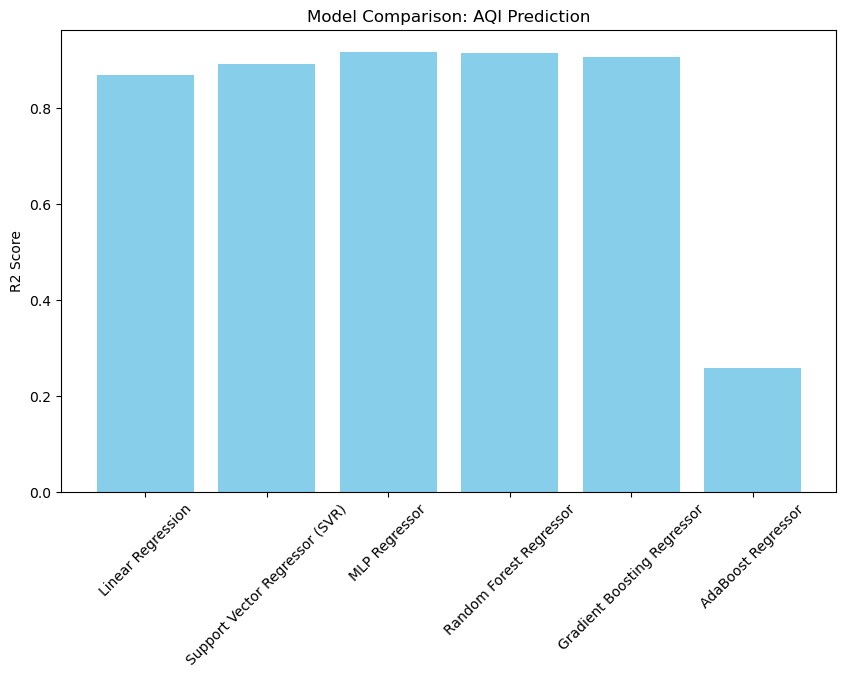

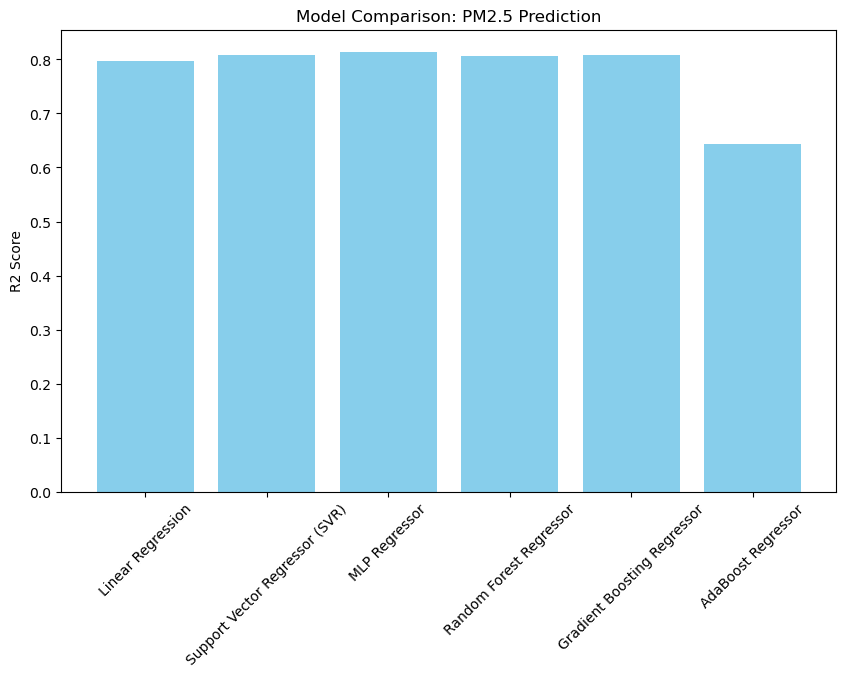

In [51]:
# Plotting R2 scores for comparison
def plot_r2_scores(results, task_name):
    r2_scores = [metrics['R2 Score'] for metrics in results.values()]
    model_names = list(results.keys())
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, r2_scores, color='skyblue')
    plt.ylabel('R2 Score')
    plt.title(f'Model Comparison: {task_name}')
    plt.xticks(rotation=45)
    plt.show()

plot_r2_scores(aqi_results, 'AQI Prediction')
plot_r2_scores(pm25_results, 'PM2.5 Prediction')

Hyperparameter Tuning

In [279]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from joblib import load


In [281]:
X = np.random.rand(100, 10)  
y = np.random.rand(100) 

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MaxAbsScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [285]:
rf_model = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  
    verbose=2,
    random_state=42)

In [287]:
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [289]:
# Get the best parameters and score

best_params = random_search.best_params_
best_score = -random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (neg MSE): {best_score}")

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best Score (neg MSE): 0.08581196509300582


In [291]:
# Retrieve the best model
best_model = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse}")
print(f"R2 Score on Test Set: {r2}")

Mean Squared Error on Test Set: 0.0694778195853709
R2 Score on Test Set: -0.09026982247168225


In [293]:
# Save the best model 
best_rf_model = random_search.best_estimator_


joblib.dump(best_rf_model, 'random_forest_model.pkl')


joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


Creating and Saving Pipeline

In [295]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', MaxAbsScaler()), 
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

pipeline.fit(X_train, y_train)



Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [297]:
joblib.dump(pipeline, 'rf_pipeline.pkl')

print("Pipeline saved successfully!")

Pipeline saved successfully!


Test with Unseen Data

In [221]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.pipeline import Pipeline


In [299]:
data_path = 'python files/capstone - ML Project/Taiwan Air Quality Index Data .csv'

# Load the saved model and scaler
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')
pipeline = joblib.load('random_forest_model.pkl')

unseen_data = data.sample(frac=0.1, random_state=42)

# Save the unseen data for future testing
unseen_data.to_csv('unseen_data.csv', index=False)
print("Unseen data created and saved successfully!")


Unseen data created and saved successfully!


In [227]:
# Load the unseen test data

unseen_data = pd.read_csv('unseen_data.csv')
print("Loaded unseen data:")
unseen_data.info()


Loaded unseen data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   county     6224 non-null   object 
 1   aqi        6224 non-null   float64
 2   pollutant  6224 non-null   object 
 3   status     6224 non-null   object 
 4   so2        6224 non-null   float64
 5   co         6224 non-null   float64
 6   o3         6224 non-null   float64
 7   o3_8hr     6224 non-null   float64
 8   pm10       6224 non-null   float64
 9   pm2.5      6224 non-null   float64
 10  no2        6224 non-null   float64
 11  nox        6224 non-null   float64
 12  no         6224 non-null   float64
 13  windspeed  6224 non-null   object 
 14  winddirec  6224 non-null   object 
 15  unit       0 non-null      float64
 16  co_8hr     6224 non-null   float64
 17  pm2.5_avg  6224 non-null   float64
 18  pm10_avg   6224 non-null   float64
 19  so2_avg    6224 non-null   f

In [361]:
training_columns = ['county','aqi', 'pollutant', 'pm2.5', 'pm2.5_avg', 'pm10', 'pm10_avg', 'so2', 'so2_avg', 'status']

unseen_data = unseen_data[training_columns]

In [363]:
# Identify categorical columns 
categorical_columns = unseen_data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_columns:
    unseen_data[col] = label_encoder.fit_transform(unseen_data[col])

In [365]:
# Extract features and target variables (AQI and PM2.5)
features = unseen_data  
true_labels_aqi = unseen_data['aqi']  
true_labels_pm25 = unseen_data['pm2.5']  


# Make predictions using the pipeline (scaling + model prediction)
predictions_aqi = pipeline.predict(features)  
predictions_pm25 = pipeline.predict(features)  


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [307]:
# Evaluate the model for both AQI and PM2.5
mse_aqi = mean_squared_error(true_labels_aqi, predictions_aqi)
rmse_aqi = np.sqrt(mse_aqi)
r2_aqi = r2_score(true_labels_aqi, predictions_aqi)

mse_pm25 = mean_squared_error(true_labels_pm25, predictions_pm25)
rmse_pm25 = np.sqrt(mse_pm25)
r2_pm25 = r2_score(true_labels_pm25, predictions_pm25)

In [311]:
# Print evaluation metrics for AQI
print("Model Evaluation on Unseen Data (AQI Prediction)")
print(f"Mean Squared Error (MSE): {mse_aqi}")
print(f"Root Mean Squared Error (RMSE): {rmse_aqi}")
print(f"R2 (R2 Score): {r2_aqi}")

Model Evaluation on Unseen Data (AQI Prediction)
Mean Squared Error (MSE): 1425.192055750787
Root Mean Squared Error (RMSE): 37.75171593121016
R2 (R2 Score): -6.529284769737583


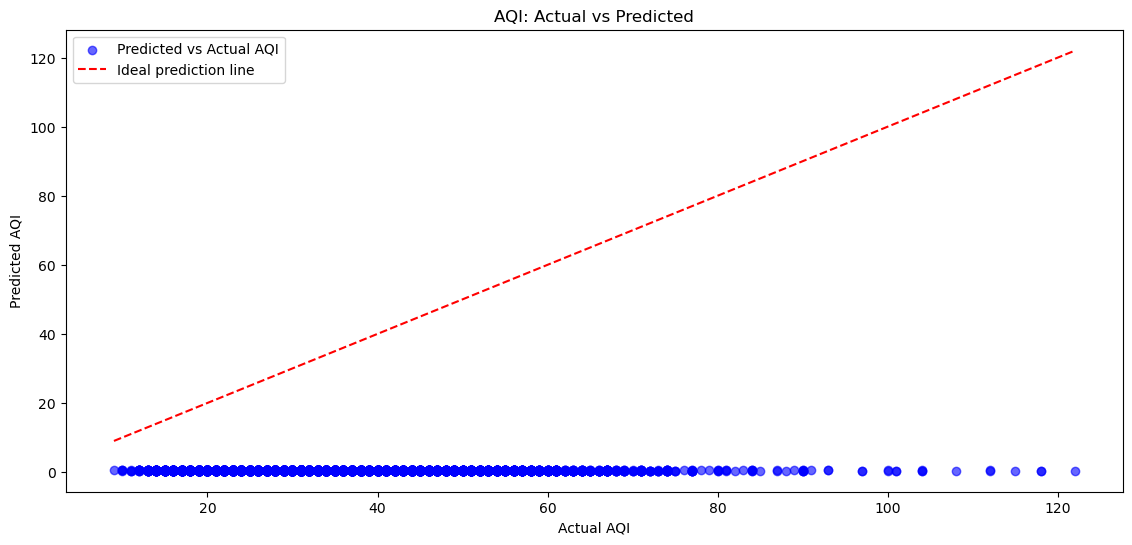

In [369]:
# Actual vs Predicted AQI

plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
plt.scatter(true_labels_aqi, predictions_aqi, color='blue', alpha=0.6, label='Predicted vs Actual AQI')
plt.plot([true_labels_aqi.min(), true_labels_aqi.max()], [true_labels_aqi.min(), true_labels_aqi.max()], color='red', linestyle='--', label='Ideal prediction line')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('AQI: Actual vs Predicted')
plt.legend()

In [313]:
# Print evaluation metrics for PM2.5
print("\nModel Evaluation on Unseen Data (PM2.5 Prediction)")
print(f"Mean Squared Error (MSE): {mse_pm25}")
print(f"Root Mean Squared Error (RMSE): {rmse_pm25}")
print(f"R2 (R2 Score): {r2_pm25}")


Model Evaluation on Unseen Data (PM2.5 Prediction)
Mean Squared Error (MSE): 127.96954709753565
Root Mean Squared Error (RMSE): 11.312362578061917
R2 (R2 Score): -3.085898786876066


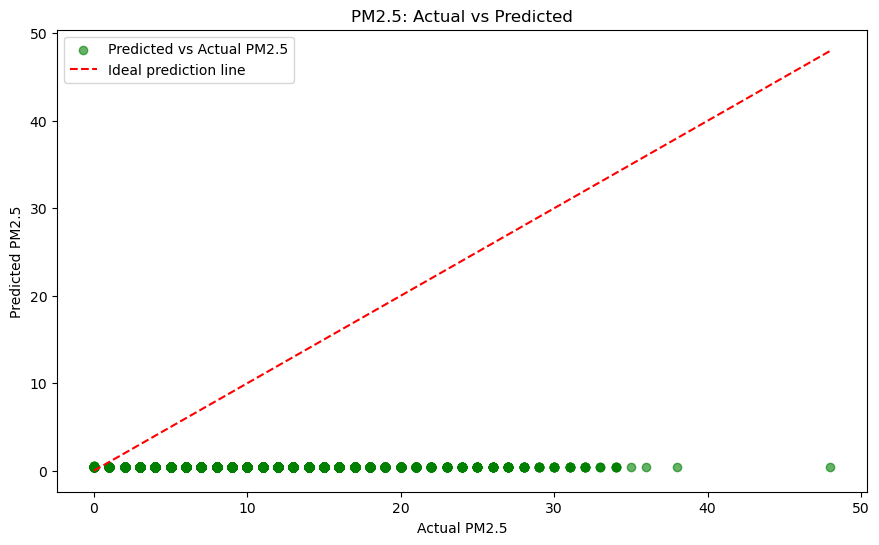

In [367]:
# Actual vs Predicted PM2.5
plt.figure(figsize=(23, 6))
plt.subplot(1, 2, 2)
plt.scatter(true_labels_pm25, predictions_pm25, color='green', alpha=0.6, label='Predicted vs Actual PM2.5')
plt.plot([true_labels_pm25.min(), true_labels_pm25.max()], [true_labels_pm25.min(), true_labels_pm25.max()], color='red', linestyle='--', label='Ideal prediction line')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('PM2.5: Actual vs Predicted')
plt.legend()

In [315]:
# Interpretation of Results (Conclusion)

print("\nConclusion:")
print("The model shows the following performance metrics for AQI:")
print(f"- RMSE: {rmse_aqi}, which indicates the average deviation in predicted AQI values.")
print(f"- R2 : {r2_aqi}, representing the proportion of variance explained by the model for AQI.")




Conclusion:
The model shows the following performance metrics for AQI:
- RMSE: 37.75171593121016, which indicates the average deviation in predicted AQI values.
- R2 : -6.529284769737583, representing the proportion of variance explained by the model for AQI.


In [317]:
print("\nThe model shows the following performance metrics for PM2.5:")
print(f"- RMSE: {rmse_pm25}, which indicates the average deviation in predicted PM2.5 levels.")
print(f"- R2 : {r2_pm25}, representing the proportion of variance explained by the model for PM2.5.")


The model shows the following performance metrics for PM2.5:
- RMSE: 11.312362578061917, which indicates the average deviation in predicted PM2.5 levels.
- R2 : -3.085898786876066, representing the proportion of variance explained by the model for PM2.5.


<Figure size 640x480 with 0 Axes>

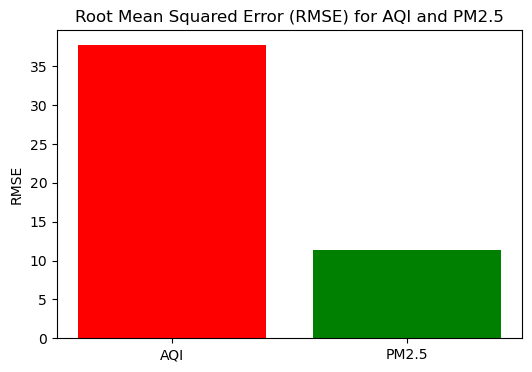

In [341]:
plt.tight_layout()
plt.show()

# Plotting RMSE for both AQI and PM2.5
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(['AQI', 'PM2.5'], [rmse_aqi, rmse_pm25], color=['red', 'green'])
ax.set_ylabel('RMSE')
ax.set_title('Root Mean Squared Error (RMSE) for AQI and PM2.5')
plt.show()

<Figure size 640x480 with 0 Axes>

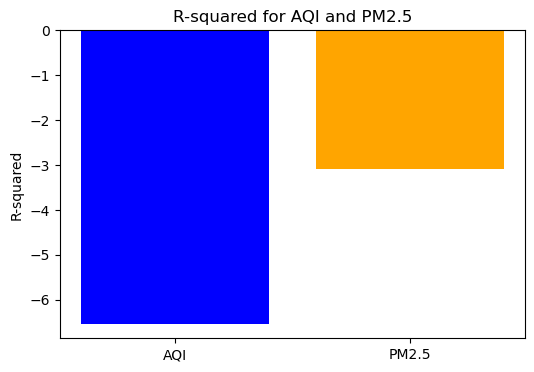

In [343]:
plt.tight_layout()
plt.show()

# Plotting R2 Score for both AQI and PM2.5
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(['AQI', 'PM2.5'], [r2_aqi, r2_pm25], color=['blue', 'orange'])
ax.set_ylabel('R-squared')
ax.set_title('R-squared for AQI and PM2.5')
plt.show()

In [351]:
if r2_aqi < 0.7:
    print("\nThe AQI model's R-squared score is less than 0.7, indicating for improvement.")
    print("Consider additional feature engineering")



The AQI model's R-squared score is less than 0.7, indicating for improvement.
Consider additional feature engineering


In [349]:
if r2_pm25 < 0.7:
    print("\nThe PM2.5 model's R-squared score is less than 0.7, indicating for improvement.")
    print("Consider additional feature engineering")
    


The PM2.5 model's R-squared score is less than 0.7, indicating for improvement.
Consider additional feature engineering


In [319]:
# Limitations of the Dataset
print("\nDataset Limitations:")
print("- The dataset might have temporal imbalances affecting prediction accuracy.")
print("- Missing data points or noise could impact model performance.")
print("- Certain pollutant values might not have sufficient variation to capture strong trends.")



Dataset Limitations:
- The dataset might have temporal imbalances affecting prediction accuracy.
- Missing data points or noise could impact model performance.
- Certain pollutant values might not have sufficient variation to capture strong trends.


In [353]:
# Future Work

print("\nFuture Work Recommendations:")
print("1. Explore deep learning models like LSTM or CNN for temporal and spatial data.")
print("2. Periodically update the model with the latest data to maintain relevance.")
print("3. Address imbalanced data through techniques like SMOTE or class weighting.")
print("4. Include additional features such as meteorological conditions or socioeconomic data.")


Future Work Recommendations:
1. Explore deep learning models like LSTM or CNN for temporal and spatial data.
2. Periodically update the model with the latest data to maintain relevance.
3. Address imbalanced data through techniques like SMOTE or class weighting.
4. Include additional features such as meteorological conditions or socioeconomic data.


In [371]:
print("Thank you for reviewing my project")
print("Jishnu E Karat")

Thank you for reviewing my project
Jishnu E Karat
